Iteration: 40, Cost: 1.2907
Iteration: 80, Cost: 1.2245
Iteration: 120, Cost: 0.8083
Iteration: 160, Cost: 0.1326
Iteration: 200, Cost: 0.0234
Iteration: 240, Cost: 0.0153
Iteration: 280, Cost: 0.0118
Iteration: 320, Cost: 0.0089
Iteration: 360, Cost: 0.0092
Iteration: 400, Cost: 0.0070
Max Iteration: 400, Mean Absolute Error: 0.0538
Iteration: 40, Cost: 0.0024
Iteration: 80, Cost: 0.0013
Iteration: 120, Cost: 0.0008
Iteration: 160, Cost: 0.0007
Iteration: 200, Cost: 0.0006
Iteration: 240, Cost: 0.0002
Iteration: 280, Cost: 0.0001
Iteration: 320, Cost: 0.0000
Iteration: 360, Cost: 0.0000
Iteration: 400, Cost: 0.0000
Max Iteration: 400, Mean Absolute Error: 0.0035


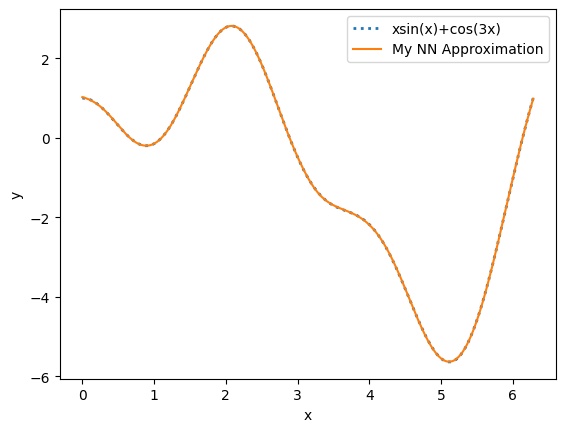

In [1]:
from MyNeuralNet import FirstOrderSolver
from MyNeuralNet import QuasiNewtonSolver
from MyNeuralNet import NeuralNet
import matplotlib.pyplot as plt
import numpy as np

x=np.array([np.linspace(0,2*np.pi,1000)])
y=x*np.sin(x)+np.cos(3*x)
# Initialize Neural Net
NN=NeuralNet([1,5,5,5,1],'tanh')


# Optimization
NN=FirstOrderSolver(x,y,'ADAM',MaxIter=400,StepSize=2e-3,BatchSize=100,Net=NN,m1=0.9,m2=0.999)
NN=QuasiNewtonSolver(x,y,NN,400)
# Visualization
y0=NN.Evaluate(x)

plt.figure
plt.plot(x[0,:],y[0,:], label = "xsin(x)+cos(3x)",linestyle=':',linewidth=2)
plt.plot(x[0,:],y0[0,:], label = "My NN Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Iteration 100, Cost: 18.8291
Iteration 200, Cost: 15.3193
Iteration 300, Cost: 13.3927
Iteration 400, Cost: 12.9766
Iteration 500, Cost: 12.8134
Iteration 600, Cost: 12.7037
Iteration 700, Cost: 12.6050
Iteration 800, Cost: 12.5071


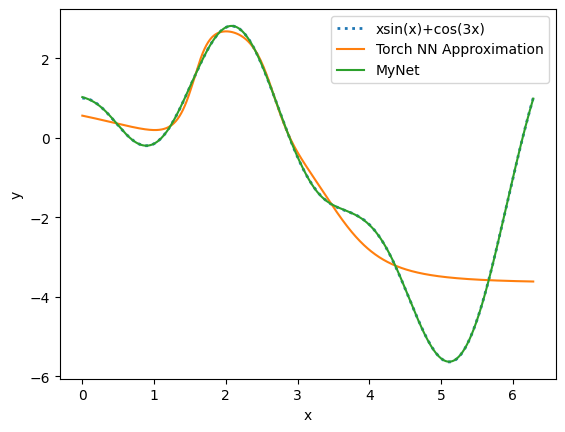

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
# NetStruct = [InputSize,HiddenSize,HiddenSize,HiddenSize,OutputSize]
class TorchNN(nn.Module):
    def __init__(self, InputSize, HiddenSize, OutputSize):
        super(TorchNN, self).__init__()
        self.fc1 = nn.Linear(InputSize, HiddenSize)
        self.fc2 = nn.Linear(HiddenSize, HiddenSize)
        self.fc3 = nn.Linear(HiddenSize, HiddenSize)
        self.fc4 = nn.Linear(HiddenSize, OutputSize)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x

# Generate Data

x = np.linspace(0, 2*np.pi, 1000)
y = x*np.sin(x)+np.cos(3*x)
xTensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
yTensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Set Up LayeyStruct
InputSize = 1
HiddenSize = 5
OutputSize = 1
model = TorchNN(InputSize, HiddenSize, OutputSize)

# Solver Set Up
optimizer = optim.Adam(model.parameters(),lr=2e-3)
Cost = nn.MSELoss()

# Parameters Set Up
BatchSize = 100
MaxIter = 800
NumOfBatch = len(x) // BatchSize

# Iterations
for i in range(MaxIter):
    tl = 0
    for j in range(NumOfBatch):
        StartIndex = j * BatchSize
        EndIndex = (j + 1) * BatchSize
        sx = xTensor[StartIndex:EndIndex]
        sy = yTensor[StartIndex:EndIndex]

        optimizer.zero_grad()
        outputs = model(sx)
        loss = Cost(outputs, sy)
        loss.backward()
        optimizer.step()

        tl = tl+loss.item()

    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1}, Cost: {tl:.4f}")

# Evaluate
input_value = torch.tensor([[1.0]], dtype=torch.float32)
with torch.no_grad():
    prediction = model(input_value)
predicted_value = prediction.item()



# Visualization
x_test = np.linspace(0, 2*np.pi, 1000)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
with torch.no_grad():
    y_test_predicted = model(x_test_tensor).numpy()

x0=np.array([np.linspace(0,2*np.pi,1000)])
y0=NN.Evaluate(x0)
plt.plot(x, y, label="xsin(x)+cos(3x)",linestyle=':',linewidth=2)
plt.plot(x_test, y_test_predicted, label="Torch NN Approximation")
plt.plot(x0[0,:], y0[0,:], label='MyNet')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

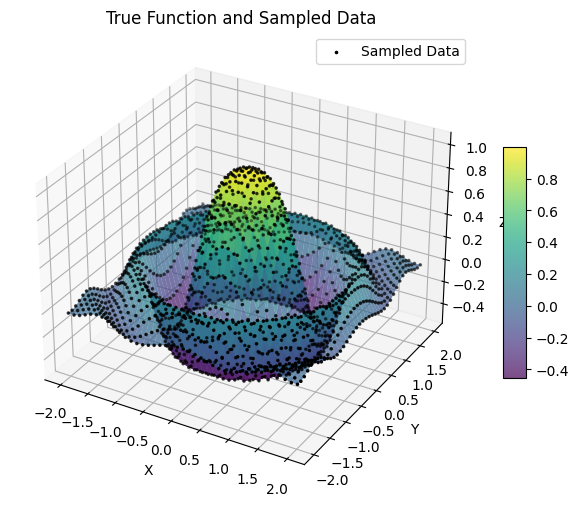

Iteration: 20, Cost: 0.0523
Iteration: 40, Cost: 0.0236
Iteration: 60, Cost: 0.0129
Iteration: 80, Cost: 0.0097
Iteration: 100, Cost: 0.0078
Iteration: 120, Cost: 0.0064
Iteration: 140, Cost: 0.0056
Iteration: 160, Cost: 0.0050
Iteration: 180, Cost: 0.0046
Iteration: 200, Cost: 0.0043
Max Iteration: 200, Mean Absolute Error: 0.0511
Iteration: 50, Cost: 0.0021
Iteration: 100, Cost: 0.0012
Iteration: 150, Cost: 0.0009
Iteration: 200, Cost: 0.0005
Iteration: 250, Cost: 0.0004
Iteration: 300, Cost: 0.0002
Iteration: 350, Cost: 0.0002
Iteration: 400, Cost: 0.0001
Iteration: 450, Cost: 0.0001
Iteration: 500, Cost: 0.0001
Max Iteration: 500, Mean Absolute Error: 0.0059


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = np.array(np.linspace(-2, 2, 40))
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
Z = np.exp(-0.5*(X**2 + Y**2)) * np.cos(2*X**2 + 2*Y**2)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

scatter = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), color='black', marker='.', s=10, label='Sampled Data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('True Function and Sampled Data')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax.legend(loc='upper right')

plt.show()


NumOfSample = 1000
xSample = X.flatten()
ySample = Y.flatten()
zSample = np.exp(-0.5*(xSample**2 + ySample**2)) * np.cos(2*xSample**2 + 2*ySample**2)
x1=np.array([xSample])
y1=np.array([ySample])
z1=np.array([zSample])
data = np.concatenate((x1,y1), axis=0)
label = z1

Layer=[2,8,8,8,1]
MyNN=NeuralNet(Layer,'gaussian')
NN=FirstOrderSolver(data,label,'ADAM',MaxIter=200,StepSize=2e-3,BatchSize=300,Net=MyNN,m1=0.9,m2=0.999)
NN=QuasiNewtonSolver(data,label,MyNN,500)
# Visualization
MyPrediction=NN.Evaluate(data)
Error=label-MyPrediction



In [4]:
from torch.utils.data import TensorDataset, DataLoader


class MyNeuralNetwork(nn.Module):
    def __init__(self, InputSize, HiddenSize, OutputSize):
        super(MyNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(InputSize, HiddenSize)
        self.fc2 = nn.Linear(HiddenSize, HiddenSize)
        self.fc3 = nn.Linear(HiddenSize, HiddenSize)
        self.fc4 = nn.Linear(HiddenSize, OutputSize)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x


XTensor = torch.tensor(X, dtype=torch.float32)
YTensor = torch.tensor(Y, dtype=torch.float32)
ZTensor = torch.tensor(Z, dtype=torch.float32)


InputSize = 2
HiddenSize = 8
OutputSize = 1

model = MyNeuralNetwork(InputSize, HiddenSize, OutputSize)


optimizer = optim.Adam(model.parameters(), lr=2e-3)
costFunction = nn.MSELoss()
dataset = TensorDataset(XTensor.view(-1, 1), YTensor.view(-1, 1), ZTensor.view(-1, 1))


BatchSize = 200
dataLoader = DataLoader(dataset, batch_size=BatchSize, shuffle=True)
MaxIter = 800

# Iteration
for i in range(MaxIter):
    totalLoss = 0
    for batchX, batchY, batchZ in dataLoader:
        optimizer.zero_grad()
        outputs = model(torch.cat([batchX, batchY], dim=1))
        loss = costFunction(outputs, batchZ)
        loss.backward()
        optimizer.step()

        totalLoss += loss.item()

    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1}, Cost: {totalLoss:.4f}")

# Evaluate
with torch.no_grad():
    model.eval()
    TorchValues = model(torch.cat([XTensor.view(-1, 1), YTensor.view(-1, 1)], dim=1))
    TorchValues = TorchValues.view(X.shape)

TorchErrors = TorchValues - ZTensor
TorchErrors=TorchErrors.numpy()

Iteration 100, Cost: 0.3089
Iteration 200, Cost: 0.2070
Iteration 300, Cost: 0.1496
Iteration 400, Cost: 0.1175
Iteration 500, Cost: 0.0970
Iteration 600, Cost: 0.0830
Iteration 700, Cost: 0.0657
Iteration 800, Cost: 0.0399


Mean Absolute Error of the Net trained by two-stage optimization: 0.0059
Mean Absolute Error of the Net trained by pure Adam: 0.0559


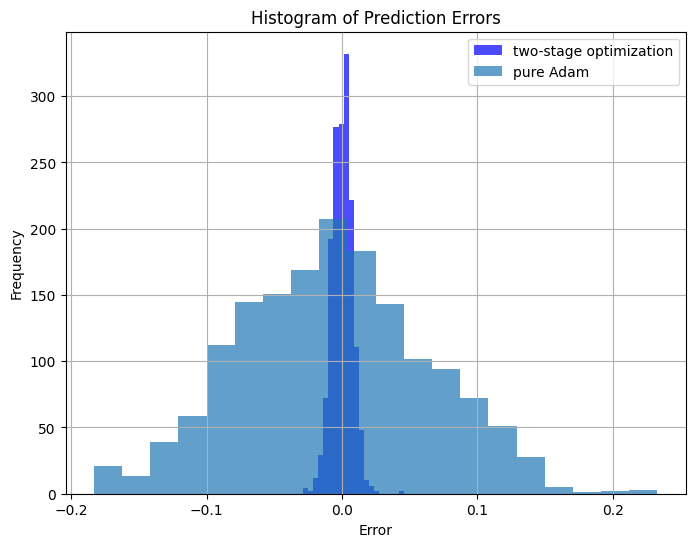

In [5]:
# Stats
TorchMAE=np.mean(np.abs(TorchErrors.flatten()))
MAE=np.mean(np.abs(Error.flatten()))
print(f"Mean Absolute Error of the Net trained by two-stage optimization: {MAE:.4f}")
print(f"Mean Absolute Error of the Net trained by pure Adam: {TorchMAE:.4f}")
plt.figure(figsize=(8, 6))
plt.hist(Error.flatten(), bins=20,color='blue',alpha=0.7,label='two-stage optimization')
plt.hist(TorchErrors.flatten(), bins=20, alpha=0.7,label='pure Adam')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()